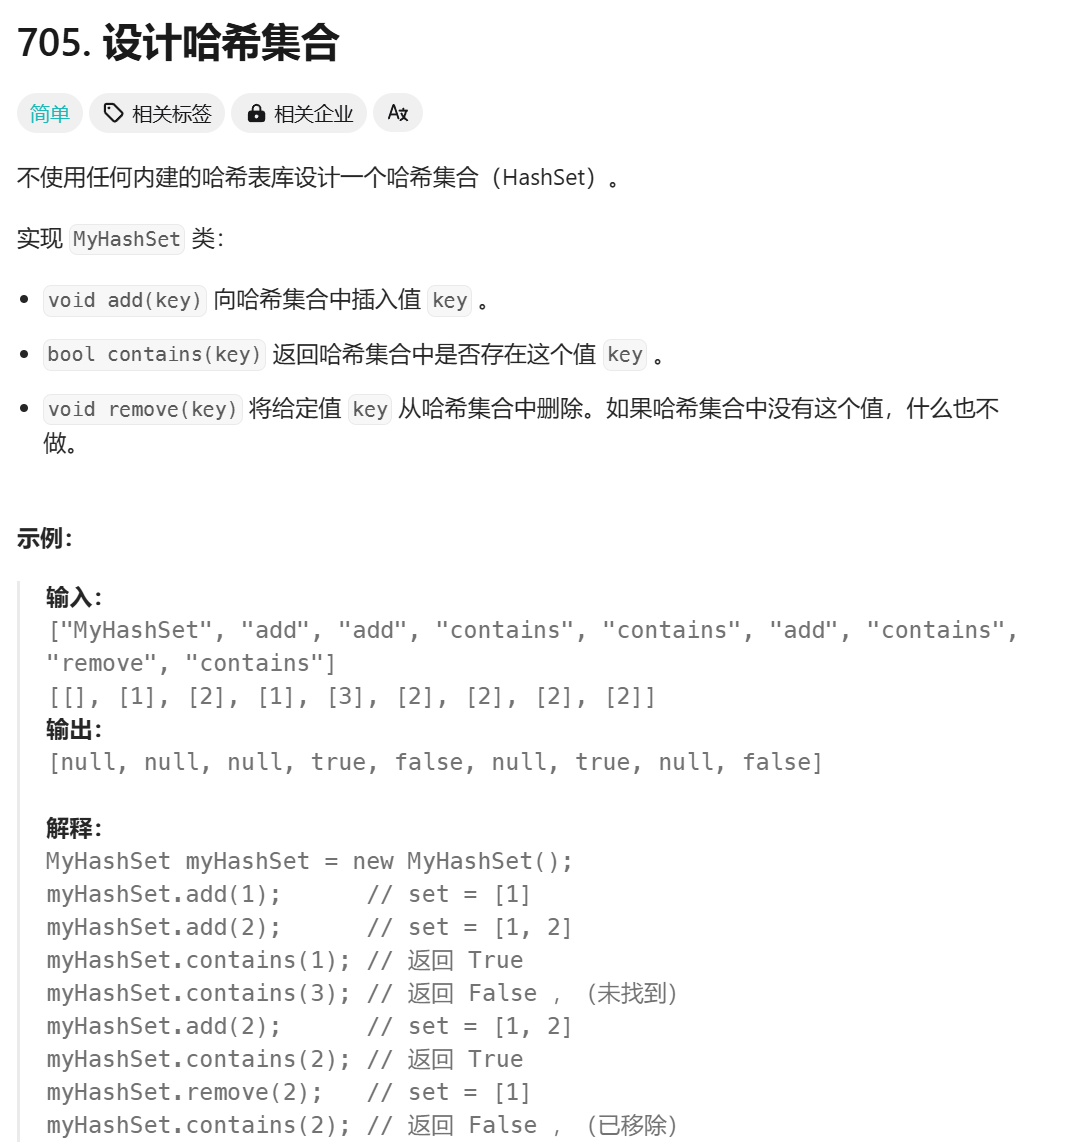

定义一个一维长度为 $buckets$ 的二维数组 $table$。

第一维度用于计算哈希函数，为 $key$ 进行分桶。第二个维度用于寻找 $key$ 存放的具体位置。第二维度的数组会根据 $key$ 值动态增长，模拟真正的链表。

- 因为最多有一百万个，所以第一个维度桶的个数为1000个，然后每个桶内可以放1000个key
分桶数一般取质数，这是因为经验上来说，质数个的分桶能让数据更加分散到各个桶中。下面的代码中把分桶数去了 1009，是因为 1009 是大于 1000 的第一个质数。

- 定长拉链数组
这个方法本质上就是把 HashSet 设计成一个 M∗N 的二维数组。第一个维度用于计算 hash 分桶，第二个维度寻找 key 存放具体的位置。用了一个优化：第二个维度的数组只有当需要构建时才会产生，这样可以节省内存。

优点：两个维度都可以直接计算出来，查找和删除只用两次访问内存。
缺点：需要预知数据范围，用于设计第二个维度的数组大小。
```
Python
class MyHashMap(object):

    def __init__(self):
        self.map = [[-1] * 1000 for _ in range(1001)]

    def put(self, key, value):
        row, col = key // 1000, key % 1000
        self.map[row][col] = value

    def get(self, key):
        row, col = key // 1000, key % 1000
        return self.map[row][col]

    def remove(self, key):
        row, col = key // 1000, key % 1000
        self.map[row][col] = -1
```

时间复杂度：O(1)
空间复杂度：O(数据范围)




- 不定长拉链数组
不定长的拉链数组是说拉链会根据分桶中的 key 动态增长，更类似于真正的链表。

分桶数一般取质数，这是因为经验上来说，质数个的分桶能让数据更加分散到各个桶中。下面的代码中把分桶数去了 1009，是因为 1009 是大于 1000 的第一个质数。

优点：节省内存，不用预知数据范围；
缺点：在链表中查找元素需要遍历。
```
Python
class MyHashMap:

    def __init__(self):
        self.buckets = 1009
        self.table = [[] for _ in range(self.buckets)]

    def hash(self, key):
        return key % self.buckets
    
    def put(self, key: int, value: int) -> None:
        hashkey = self.hash(key)
        for item in self.table[hashkey]:
            if item[0] == key:
                item[1] = value
                return
        self.table[hashkey].append([key, value])

    def get(self, key: int) -> int:
        hashkey = self.hash(key)
        for item in self.table[hashkey]:
            if item[0] == key:
                return item[1]
        return -1

    def remove(self, key: int) -> None:
        hashkey = self.hash(key)
        for i, item in enumerate(self.table[hashkey]):
            if item[0] == key:
                self.table[hashkey].pop(i)
                return
```
时间复杂度：O(N/b)，N 是元素个数，b 是桶数。
空间复杂度：O(N)
在实际测试中，发现「不定长拉链数组」法速度最快，我的理解是，大块的内存分配也是需要时间的。因此避免大块的内存分配，也是在节省时间。

作者：负雪明烛
链接：https://leetcode.cn/problems/design-hashmap/solutions/654877/xiang-jie-hashmap-de-she-ji-zai-shi-jian-85k9/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [ ]:

class MyHashSet:

    def __init__(self):
        self.bucket = 1009
        self.table = [[] for _ in range(self.bucket)] # 建立了1001个列表（桶），桶就是重复元素挂载的链表！！！！！！！！

    def hashmap(self, key: int) -> int:   # 将key 分桶
        return key % self.bucket

    def add(self, key: int) -> None:
        hash_key = self.hashmap(key)
        if key in self.table[hash_key]:
            return
        else:
            self.table[hash_key].append(key)

    def remove(self, key: int) -> None:
        hash_key = self.hashmap(key)
        if key not in self.table[hash_key]:
            return
        else:
            self.table[hash_key].remove(key)

    def contains(self, key: int) -> bool:
        hash_key = self.hashmap(key)
        return key in self.table[hash_key]


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

In [ ]:
class MyHashSet:

    def __init__(self):
        self.dict = set() # 集合


    def add(self, key: int) -> None:
        self.dict.add(key)


    def remove(self, key: int) -> None:
        if key in self.dict:
            self.dict.remove(key)

    def contains(self, key: int) -> bool:
        return (key in self.dict)

In [3]:

# 尝试类中属性的特性


class test:
    def __init__(self) -> None:
        self.key = 10
    
    def modify(self, val):
        val += 1
        return val
    def add(self, val):
        key = 1
        key = val + key
        return key
    def add2(self):
        self.key += 1
        return self.key
    
a = test()
print(a.key)
print(a.modify(-1)) # 0
print(a.add(1))
print(a.add2())
    


10
0
2
11
